In [20]:
import numpy as np

# Создание датасета

Датасет был создан в файле perser.py, и предобработан в read_json.py

# Предобработка

In [21]:
data = np.load('songs.npy')
data

array([['ive been dyin to tell you anything you want to hear cause thats just who i am this week lie in the grass next to the mausoleum im just a notch in your bedpost but youre just a line in a song notch in your bedpost but youre just a line in a song   drop a heart and break a name were always sleeping in and sleeping for the wrong team  were goin down down in an earlier round and sugar were going down swingin ill be your number one with a bullet a loaded god complex cock it and pull it were goin down down in an earlier round and sugar were going down swingin ill be your number one with a bullet a loaded god complex cock it and pull it   is this more than you bargained for yet oh dont mind me im watching you two from the closet wishing to be the friction in your jeans isnt it messed up how im just dyin to be him im just a notch in your bedpost but youre just a line in a song notch in your bedpost but youre just a line in a song you might also like drop a heart and break a name were 

In [22]:
X = data[:, 0]
y = data[:, 1]

Воспользуемся TF-IDF для того, чтобы преобразовать текст в вектор из

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

obj = TfidfVectorizer()
X_tfidf = obj.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, train_size=0.7)

In [11]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=len(set(y)))
model.fit(X_tfidf)

KMeans()

In [18]:
from sklearn.preprocessing import LabelEncoder

artist_names = list(set(y))

labels = model.labels_
encoder = LabelEncoder()
true_labels = encoder.fit_transform(y)

In [19]:
from sklearn.metrics import adjusted_rand_score

print(true_labels)
print(labels)

ari_score = adjusted_rand_score(true_labels, labels)
print("Adjusted Rand Index:", ari_score)

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5]
[4 4 4 4 4 4 1 4 3 4 4 4 2 5 4 4 1 5 6 5 4 1 4 3 1 1 1 4 1 5 3 4 4 3 4 4 1
 4 4 4 4 4 4 4 4 4 1 2 4 1 5 4 4 3 4 5 4 4 1 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4
 4 4 4 4 7 3 4 4 3 5 4 4 1 4 4 4 1 4 4 4 4 1 4 4 4 4 1 1 1 5 5 5 5 4 1 1 5
 5 1 5 5 5 5 1 5 5 5 5 1 5 4 5 1 1 5 5 5 5 4 1 5 5 4 5 5 1 4 4 4 4 4 1 4 4
 4 1 7 4 0 3 4 4 5 1 4 1]
Adjusted Rand Index: 0.07069724860801134


In [37]:
from sklearn.preprocessing import LabelEncoder

# Инициализация и применение LabelEncoder
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform()

# Вывод преобразованных меток кластеров
print("Преобразованные метки кластеров:", true_labels_encoded)


Преобразованные метки кластеров: [0 4 5 3 6 2 7 1]


# KMeans

In [40]:
labels = [i for i in range(len(list(set(y))))]
labels

[0, 1, 2, 3, 4, 5, 6, 7]

In [43]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=8)
cluster_labels = clusterer.fit(X_train)
print(cluster_labels)

# clf.fit(X_train)
#
# cluster_labels = clf.labels_
#
# Вывод меток кластеров для каждой песни
# for i, label in enumerate(cluster_labels):
#     print(f"Песня {i+1} отнесена к кластеру {label+1}")


KMeans()


In [27]:
y_pred = clf.predict(X_test)

# Проверим результаты

In [26]:
cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 2, 3, 3, 4, 4,
       3, 3, 4, 3, 3, 3, 3, 0, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 0, 3, 4,
       3, 3, 0, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 2, 3, 4, 4, 3,
       3, 1, 3, 0, 4, 3, 3, 4, 2, 3, 3, 4, 4, 3, 3, 0, 4, 4, 3, 3, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 0, 3, 3, 0, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3,
       3, 4], dtype=int32)

In [29]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Имитация реальных меток (жанров или исполнителей)
true_labels = y_test

# Вычисление Adjusted Rand Index
ari_score = adjusted_rand_score(y_test, y_pred)
print("Adjusted Rand Index:", ari_score)

# Вычисление Normalized Mutual Information
nmi_score = normalized_mutual_info_score(y_test, y_pred)
print("Normalized Mutual Information:", nmi_score)


Adjusted Rand Index: 0.025245262518774167
Normalized Mutual Information: 0.11835890799105639


ValueError: x and y must be the same size

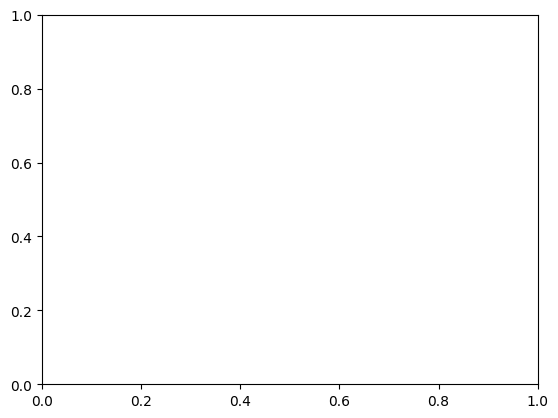

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Преобразование TF-IDF матрицы с помощью метода PCA
# pca = PCA(n_components=2)
# tfidf_matrix_2d = pca.fit_transform(X_test)

# Визуализация кластеров
plt.scatter(X_test[:, 0], y_pred, c=cluster_labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Кластеризация текстовых данных')
plt.colorbar(label='Cluster')
plt.show()
